# 1. Install rasterio & geopandas
https://rasterio.readthedocs.io/en/latest/installation.html    
 
https://geopandas.org/en/stable/getting_started/install.html

1. On windows, after installing Anaconda:     

pip install rasterio  
pip install geopandas 

*geopandas may require pip installing its dependencies

2. clone CCA_EU from https://github.com/JingyanYu/LandUseDecisions/blob/9bd4747ca46c199b63d7936d16e259e46afff9ec/A%20data-driven%20framework%20to%20manage%20uncertainty/CCA_EU.py

In [16]:
import rasterio as rio
from rasterio.plot import show

In [3]:
import geopandas as gpd

In [9]:
import CCA_EU

In [40]:
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# 2. FUA, GHSL data

The GHSL built-up raster data publicly available with identifiers doi: 10.2905/jrc-ghsl-10007    
Functional urban area vector data: https://ghsl.jrc.ec.europa.eu/ghs_fua.php

The processed GeoDataFrame of European functional urban areas & growth - the file countries_gpd.pkl can be downloaded at https://figshare.com/s/245ad30270bd7eb12f41.

In [7]:
# Load a geodataframe of functional urban areas (FUAs) in European OECD countries 
# with units of built-up urban growth between 1975-2014 

countries_gpd = pd.read_pickle(
    r"C:\Users\jyu5\Desktop\GlobalSustainableUrbanSpatialDevelopments\previous_code\reuslts_OECD\countries_gpd.pkl")
FUAs = countries_gpd['eFUA_name'].to_list()
countries = countries_gpd['Cntry_name'].to_list()

In [11]:
countries_gpd.head()

,eFUA_name,Cntry_name,FUA_area,UC_area,geometry,1975 urban,1990 urban,2000 urban,2014 urban,90-00 UG,00-14 UG,75-90 UG
252,Innsbruck,Austria,352.0,27.0,"MULTIPOLYGON (((914000.000 5590000.000, 916000...",855.0,957,1078,1173,121,95,102.0
253,Salzburg,Austria,368.0,46.0,"MULTIPOLYGON (((1031000.000 5652000.000, 10320...",1015.0,1114,1266,1421,152,155,99.0
254,Linz,Austria,875.0,69.0,"MULTIPOLYGON (((1116000.000 5708000.000, 11250...",1908.0,2214,2555,2879,341,324,306.0
255,Klagenfurt,Austria,462.0,26.0,"MULTIPOLYGON (((1139000.000 5531000.000, 11400...",847.0,967,1027,1167,60,140,120.0
256,Graz,Austria,978.0,73.0,"MULTIPOLYGON (((1206000.000 5582000.000, 12070...",1420.0,1440,1743,1930,303,187,20.0


# 3. Use CCA

The reclassified maps can be found at: https://figshare.com/s/406b4f8506dfdb80e9b6

The parameters can be found at: https://figshare.com/s/650730f9e6fedc44ac1a

In [42]:
# Load fact maps of functional urban areas, binarily classified with urban, non-urban land uses
with open(r'C:\Users\jyu5\Desktop\GlobalSustainableUrbanSpatialDevelopments\previous_code\reuslts_OECD\categorized_FUA_1975s.pickle', 'rb') as handle:
    categorized_FUA_1975s = pickle.load(handle)
with open(r'C:\Users\jyu5\Desktop\GlobalSustainableUrbanSpatialDevelopments\previous_code\reuslts_OECD\categorized_FUA_1990s.pickle', 'rb') as handle:
    categorized_FUA_1990s = pickle.load(handle)
# with open(r'C:\Users\jyu5\Desktop\GlobalSustainableUrbanSpatialDevelopments\previous_code\reuslts_OECD\categorized_FUA_2000s.pickle', 'rb') as handle:
#     categorized_FUA_2000s = pickle.load(handle)
# with open(r'C:\Users\jyu5\Desktop\GlobalSustainableUrbanSpatialDevelopments\previous_code\reuslts_OECD\categorized_FUA_2014s.pickle', 'rb') as handle:
#     categorized_FUA_2014s = pickle.load(handle)

In [31]:
# Load the parameters for urban spatial development scenarios projection

paths = [ r'results_EU\changes_kl\Avignon_m_chain2.npy',r'results_EU\changes_kl\Poitiers_m_chain2.npy',
         r'results_EU\changes_kl\Belfast_m_chain2.npy',r'results_EU\changes_kl\Blackwater_m_chain2.npy',
         r'results_EU\changes_kl\Enschede_m_chain2.npy',r'results_EU\changes_kl\Utrecht_m_chain2.npy',
         r'results_EU\changes_kl\Leuven_m_chain2.npy',r'results_EU\changes_kl\Mons_m_chain2.npy', 
         r'results_EU\changes_kl\Mönchengladbach_m_chain2.npy',r'results_EU\changes_kl\Wuppertal_m_chain2.npy']

chains = [np.load(path,allow_pickle=True) for path in paths]
paras_best20 = [chain[0][chain[2].argsort()[:20]] for chain in chains]
seeds_best20 = [chain[1][chain[2].argsort()[:20]] for chain in chains]

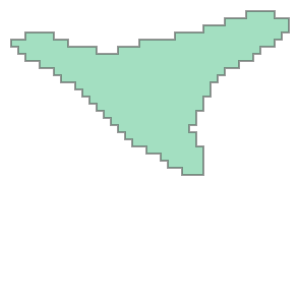

In [23]:
# The FUA polygon of Innsbruck, Austria
countries_gpd.iloc[0].geometry

In [25]:
#75-90 growth of Innsbruck, Austria

growth_num7590 = countries_gpd.iloc[0]['75-90 UG']
growth_num7590

102.0

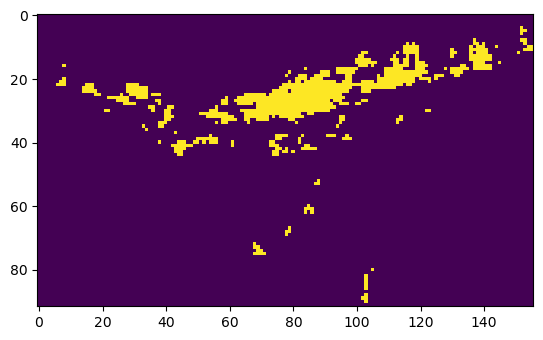

<AxesSubplot: >

In [26]:
# The urban area (cells/pixels) of Innsbruck, Austria
fua_1975 = categorized_FUA_1975s[0].copy()
fua_1975[fua_1975==-200]=0
show(fua_1975)

In [33]:
i=0
n=0
paras = paras_best20[i][n]
seed =seeds_best20[i][n]

j=0
categorized_FUA_1975 = categorized_FUA_1975s[j]
rows, cols = categorized_FUA_1975.shape
urban_num = countries_gpd.iloc[j]['75-90 UG']


result = CCA_EU.CCA_last_snapshot([paras[0],0,paras[1]],[0,paras[2],paras[3]],
                                  seed=seed,landmap=categorized_FUA_1975.copy(),
                                  rows=rows,cols=cols,urban_num=urban_num,trans_num=15) 

In [44]:
# Load the affine transform for mapping, found at https://figshare.com/s/406b4f8506dfdb80e9b6
with open(r'C:\Users\jyu5\Desktop\GlobalSustainableUrbanSpatialDevelopments\previous_code\reuslts_OECD\out_transforms1975.pkl', 'rb') as f:
    out_transforms1975 = pickle.load(f)

Text(0.5, 1.0, 'Simulated changes')

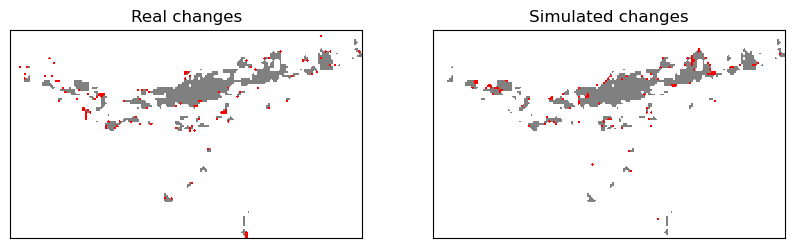

In [51]:
changes_colours = ListedColormap(['none','r'])
cmap = ListedColormap(["none","none", "grey"])

fig, axes = plt.subplots(1,2,figsize=(10,4))

result_plot = categorized_FUA_1990s[j].copy()
result_plot[result_plot==-200]=0
show(result_plot, ax=axes[0], transform=out_transforms1975[j],cmap=cmap)
previous = categorized_FUA_1975s[j].copy()
previous[previous==-200]=0
# result_plot = result_plots[i].copy()
# result_plot[result_plot==-200]=0
changes = result_plot-previous
show(changes,ax=axes[0],cmap=changes_colours,transform=out_transforms1975[j])
axes[0].tick_params(labelbottom=False,labelleft=False,axis=u'both', which=u'both',length=0)
axes[0].set_title('Real changes')

result_plot = result.copy()
result_plot[result_plot==-200]=0
show(result_plot, ax=axes[1], transform=out_transforms1975[j],cmap=cmap)
previous = categorized_FUA_1975s[j].copy()
previous[previous==-200]=0
result_plot = result.copy()
result_plot[result_plot==-200]=0
changes = result_plot-previous
show(changes,ax=axes[1],cmap=changes_colours,transform=out_transforms1975[j])
axes[1].tick_params(labelbottom=False,labelleft=False,axis=u'both', which=u'both',length=0)
axes[1].set_title('Simulated changes')